이 자료는 위키독스 딥 러닝을 이용한 자연어 처리 입문의 자동 미분과 선형 회귀 튜토리얼입니다.  

링크 : https://wikidocs.net/111472

## **06-04 자동 미분과 선형 회귀 실습**

### **1. 자동 미분**

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.19.0'

tape_gradient()는 자동 미분 기능을 수행합니다. 임의로 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mn>2</mn>
  <msup>
    <mi>w</mi>
    <mn>2</mn>
  </msup>
  <mo>+</mo>
  <mn>5</mn>
</math>라는 식을 세워보고, 에 대해 미분해보겠습니다.

In [4]:
w = tf.Variable(2.)

def f(w):
  y = w**2
  z = 2*y + 5
  return z

gradients를 출력하면 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>w</mi>
</math>
에 대해 미분한 값이 저장된 것을 확인할 수 있습니다.

In [5]:
with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


In [6]:
gradients[0].numpy()

8.0

이 자동 미분 기능을 사용하여 선형 회귀를 구현해봅시다.

### **2. 자동 미분을 이용한 선형 회귀 구현**

우선 가중치 변수 w와 b를 선언합니다. 학습될 값이므로 임의의 값인 4와 1로 초기화하였습니다.

In [7]:
# 학습될 가중치 변수를 선언
W = tf.Variable(4.0)
b = tf.Variable(1.0)
W, b

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>)

가설을 함수로서 정의합니다.

In [ ]:
@tf.function
def hypothesis(x):
  return W*x + b

#### @tf.function의 역할

**개요**
  
* `@tf.function`은 TensorFlow에서 **Python 함수를 고성능 그래프 함수(Graph Function)** 로 변환해주는 데코레이터  
* 이를 통해 **성능 향상**, **GPU/TPU 연산 최적화**, **자동 최적화**가 가능해집니다.


**주요 역할**

| 기능              | 설명 |
|-------------------|------|
| **그래프 변환**    | Python 코드를 TensorFlow 계산 그래프로 변환 |
| **속도 향상**      | Python 인터프리터 없이 빠르게 실행 |
| **자동 최적화**    | 불필요한 연산 병합, 계산 캐싱 등 최적화 |
| **분산 실행 가능** | GPU, TPU에서 실행 가능 |
| **Autograph 지원** | `if`, `for`, `while` 문도 그래프화 가능 |


현재의 가설에서 w와 b는 각각 4와 1이므로 임의의 입력값을 넣었을 때의 결과는 다음과 같습니다.

In [9]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [10]:
hypothesis(x_test)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([15., 21., 23., 25.], dtype=float32)>

In [11]:
hypothesis(x_test).numpy()

array([15., 21., 23., 25.], dtype=float32)

다음과 같이 평균 제곱 오차를 손실 함수로서 정의합니다.

In [12]:
@tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱을 해서 평균을 취한다.
  return tf.reduce_mean(tf.square(y_pred - y))

여기서 사용할 데이터는 x와 y가 약 10배의 차이를 가지는 데이터입니다.

In [13]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

옵티마이저는 경사 하강법을 사용하되, 학습률(learning rate)는 0.01을 사용합니다.

In [14]:
optimizer = tf.optimizers.SGD(0.01)
optimizer

약 300번에 걸쳐서 경사 하강법을 수행하겠습니다.

In [17]:
for i in range(301):
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(x)

    # 평균 제곱 오차를 계산
    cost = mse_loss(y_pred, y)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [W, b])
  
  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [W, b]))

  if i % 10 == 0:
    print("epoch : {:3} | W의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, W.numpy(), b.numpy(), cost))
  # break

epoch :   0 | W의 값 : 10.6671 | b의 값 : 0.908 | cost : 1.062102
epoch :  10 | W의 값 : 10.6677 | b의 값 : 0.9039 | cost : 1.061931
epoch :  20 | W의 값 : 10.6683 | b의 값 : 0.8999 | cost : 1.061765
epoch :  30 | W의 값 : 10.6689 | b의 값 : 0.8961 | cost : 1.061616
epoch :  40 | W의 값 : 10.6695 | b의 값 : 0.8924 | cost : 1.061478
epoch :  50 | W의 값 : 10.6701 | b의 값 : 0.8889 | cost : 1.061354
epoch :  60 | W의 값 : 10.6706 | b의 값 : 0.8856 | cost : 1.061237
epoch :  70 | W의 값 : 10.6711 | b의 값 : 0.8824 | cost : 1.061131
epoch :  80 | W의 값 : 10.6716 | b의 값 : 0.8793 | cost : 1.061027
epoch :  90 | W의 값 : 10.6721 | b의 값 : 0.8763 | cost : 1.060937
epoch : 100 | W의 값 : 10.6725 | b의 값 : 0.8734 | cost : 1.060852
epoch : 110 | W의 값 : 10.6730 | b의 값 : 0.8707 | cost : 1.060777
epoch : 120 | W의 값 : 10.6734 | b의 값 : 0.8681 | cost : 1.060702
epoch : 130 | W의 값 : 10.6738 | b의 값 : 0.8655 | cost : 1.060640
epoch : 140 | W의 값 : 10.6742 | b의 값 : 0.8631 | cost : 1.060583
epoch : 150 | W의 값 : 10.6746 | b의 값 : 0.8608 | cost : 1.

w와 b값이 계속 업데이트 됨에 따라서 cost가 지속적으로 줄어드는 것을 확인할 수 있습니다. 학습된 w와 b의 값에 대해서 임의 입력을 넣었을 경우의 예측값을 확인해봅시다.

In [18]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.21045  54.228344 59.567642 64.906944]


모델을 구현하는 방법은 한 가지가 아닙니다. 텐서플로우의 경우, 케라스라는 고수준의 API를 사용하면 모델을 이보다 좀 더 쉽게 구현할 수 있습니다. 이번에는 선형 회귀 모델을 케라스로 구현해봅시다.

### **3. 케라스로 구현하는 선형 회귀**


케라스에 대해서는 뒤의 딥 러닝 챕터에서 더 자세히 배우겠지만, 간단하게 케라스를 이용해서 선형 회귀를 구현해봅시다. 케라스로 모델을 만드는 기본적인 형식은 다음과 같습니다. Sequential로 model이라는 이름의 모델을 만들고, 그리고 add를 통해 입력과 출력 벡터의 차원과 같은 필요한 정보들을 추가해갑니다.

아래의 예시 코드를 봅시다. 첫번째 인자인 1은 출력의 차원을 정의합니다. 일반적으로 output_dim으로 표현되는 인자입니다. 두번째 인자인 input_dim은 입력의 차원을 정의하는데 이번 실습과 같이 1개의 실수 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>x</mi>
</math>
를 가지고 하는 1개의 실수 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
</math>
를 예측하는 단순 선형 회귀를 구현하는 경우에는 각각 1의 값을 가집니다..

```python
    # 예시 코드. 실행 불가.
    model = Sequential()
    model.add(keras.layers.Dense(1, input_dim=1))

```

실습을 진행해봅시다. 아래의 코드는 간단하지만, 지금까지 배운 것들이 집대성 된 코드입니다. 우선 공부한 시간을 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>x</mi>
</math>
, 각 공부한 시간에 따른 성적을 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
</math>
라고 해봅시다. activation은 어떤 함수를 사용할 것인지를 의미하는데 선형 회귀를 사용할 경우에는 linear라고 기재합니다.

옵티마이저로 기본 경사 하강법을 사용하고 싶다면, sgd라고 기재합니다. 학습률은 0.01로 정하였습니다. 손실 함수로는 평균 제곱 오차를 사 용합니다. 그리고 전체 데이터에 대한 훈련 횟수는 300으로 합니다.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [20]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적
import numpy as np
x = np.array(x)
y = np.array(y)

In [21]:
model = Sequential()

# 입력 x의 차원은 1, 출력 y의 차원도 1. 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
# sgd = optimizers.SGD(lr=0.01)
sgd = optimizers.SGD(learning_rate=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300)

Epoch 1/300


c:\Users\dlwlg\anaconda3\envs\py310_yolo\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - loss: 3185.1780 - mse: 3185.1780
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 392.9444 - mse: 392.9444
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 49.3801 - mse: 49.3801
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 7.1062 - mse: 7.1062
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1.9039 - mse: 1.9039
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 1.2630 - mse: 1.2630
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1.1833 - mse: 1.1833
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.1727 - mse: 1.1727
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1.1706 - mse: 1.1706
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 1.1696 - mse: 1.1696
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1.1686 - mse: 1.1686
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1.1677 - mse: 1.1677
Epoch 13/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/st

학습이 끝났습니다. 최종적으로 선택된 오차를 최소화하는 직선을 그래프로 그려보겠습니다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


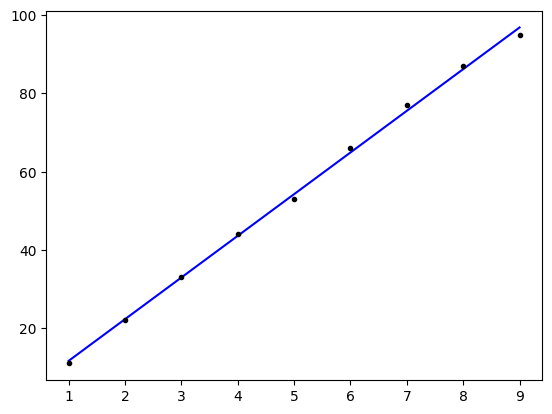

In [22]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

위의 그래프에서 각 점은 우리가 실제 주었던 실제값에 해당되며, 직선은 실제값으로부터 오차를 최소화하는 
와 
의 값을 가지는 직선입니다. 이 직선을 통해 9시간 30분을 공부하였을 때의 시험 성적을 예측하게 해봅시다. model.predict()은 학습이 완료된 모델이 입력된 데이터에 대해서 어떤 값을 예측하는지를 보여줍니다.

In [23]:
import numpy as np

print(model.predict(np.array([8.5])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[91.53745]]


8시간 30분을 공부하면 약 91.5점을 얻는다고 예측하고 있습니다.

마지막 편집일시 : 2022년 11월 14일 2:48 오후